# Проект по теме "Статистика"

Работа выполнена на языке программрования R в среде разработки RStudio.

_______________________________________________________________________________________________________________________________

### Задание 1

В результате эксперимента получены статистические данные,
представленные в виде статистического ряда. <img src=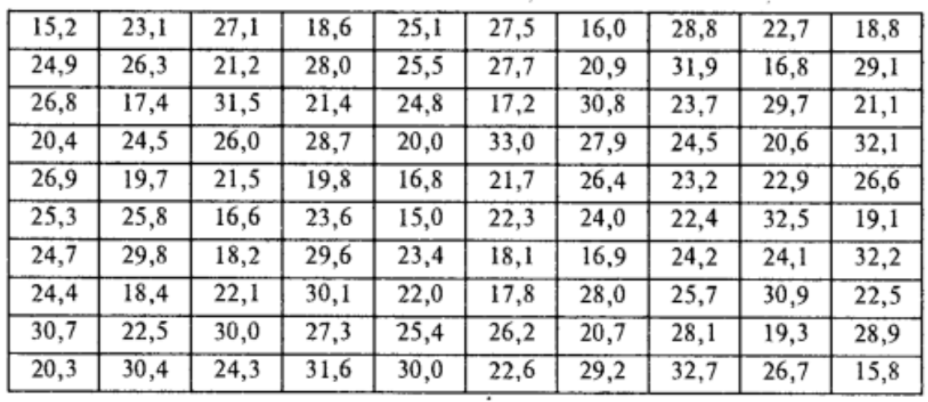 />

**1.1. Записать значения результатов эксперимента в виде вариационного ряда.**

In [1]:
numbers <- c(15.2, 23.1, 27.1, 18.6, 25.1, 27.5, 16.0, 28.8, 22.7, 18.8,
              24.9, 26.3, 21.2, 28.0, 25.5, 27.7, 20.9, 31.9, 16.8, 29.1,
              26.8, 17.4, 31.5, 21.4, 24.8, 17.2, 30.8, 23.7, 29.7, 21.1,
              20.4, 24.5, 26.0, 28.7, 20.0, 33.0, 27.9, 24.5, 20.6, 32.1,
              26.9, 19.7, 21.5, 19.8, 16.8, 21.7, 26.4, 23.2, 22.9, 26.6,
              25.3, 25.8, 16.6, 23.6, 15.0, 22.3, 24.0, 22.4, 32.5, 19.1,
              24.7, 29.8, 18.2, 29.6, 23.4, 18.1, 16.9, 24.2, 24.1, 32.2,
              24.4, 18.4, 22.1, 30.1, 22.0, 17.8, 28.0, 25.7, 30.9, 22.5,
              30.7, 22.5, 30.0, 27.3, 25.4, 26.2, 20.7, 28.1, 19.3, 28.9,
              20.3, 30.4, 24.3, 31.6, 30.0, 22.6, 29.2, 32.7, 26.7, 15.8)
row1 = transform(table(numbers))
# Функция table возвращает таблицу с частотами встречаемости каждого значения выборки.
# Функция transform модифицирует таблицу в датафрейм, выстраивая значения выборки и их частоты в столбцы.
colnames(row1) <- c('Результат эксперимента', 'Частота') #Задаём имена столбцам датафрейма
row1

Результат эксперимента,Частота
15,1
15.2,1
15.8,1
16,1
16.6,1
16.8,2
16.9,1
17.2,1
17.4,1
17.8,1


In [2]:
#Удостоверимся, что в столбце 'Freq' действительно представлены частоты полученных результатов.
with(row1, sum(Частота)) #с помощью функции with просуммируем все значения 2го столбца датафрейма

[1] 100

**1.2. Найти размах варьирования и разбить его на 9 интервалов.**

Размах варьирования - одна из мер изменчивости для данных, преставляет собой разность максимального и минимального значения.

In [3]:
max1 <- max(numbers)
min1 <- min(numbers)
range1 <- max1 - min1 #нашли размах варьирования

intervals <- table(cut(numbers, 9)) #функция cut делит вектор на равные интервалы
h <- range1 / 9   #найдём длину интервалов
#создадим вектор, содержащий середины интервалов. функция seq формирует вектор с заданным шагом, аргументы FROM, TO, BY
mids <- seq(min(numbers) + h/2, max(numbers), h) 
intervals <- transform(intervals, mids = mids)
colnames(intervals) <- c('Результат эксперимента', 'Частота', 'Середина интервала')

cat ('Размах варьирования =', range1)
cat('\nИнтервальный вариационный ряд:')
intervals

Размах варьирования = 18
Интервальный вариационный ряд:

Результат эксперимента,Частота,Середина интервала
"(15,17]",8,16
"(17,19]",8,18
"(19,21]",10,20
"(21,23]",14,22
"(23,25]",15,24
"(25,27]",14,26
"(27,29]",11,28
"(29,31]",12,30
"(31,33]",8,32


**1.3. Построить полигон частот, гистограмму относительных частот и график эмпирической функции распределения.**

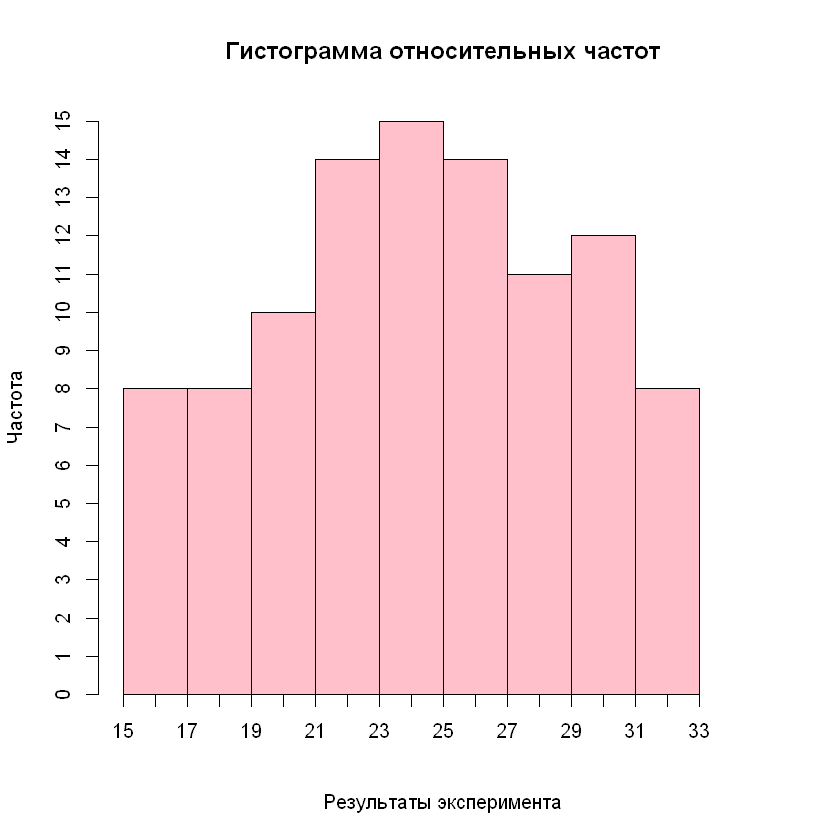

In [4]:
#Строим гистограмму относительных частот интервального ряда с помощью функции hist. В аргументах указываем выборку,
#диапазон значений оси x, добавляем цвет и информацию о гистограмме, а также breaks - кол-во интервалов (столбцов)
h1 <-  hist(numbers, xlim = c(15, 35), col = 'pink', main = 'Гистограмма относительных частот',
            xlab = 'Результаты эксперимента', ylab = 'Частота', breaks = seq(min1, max1, h), axes = F)
axis(1, at = seq(min1,max1,1),pos = 0) #задаём целые значения оси X в интервале от min до max значений выборки 
axis(2, at = c(0:max(intervals$Частота))) #задаём целые значения оси Y в интервале от 0 до максимально возможной частоты

In [5]:
#Строим полигон частот с помощью функции plot (функция для построения объектов на основе гистограммы частот h2.
#h2 <-  hist(numbers)
#График будет соединять серидины всех столбцов гистограммы. Тип 'b' означает, что график состоит из линии и точек (для наглядности)
poligon <-  plot(h2$counts ~ h2$mids, xlim = c(min1, max1+3), col = 'purple', type = 'b', main = 'Полигон частот',
      xlab = 'Результаты эксперимента', ylab = 'Частота') 

ERROR: Error in eval(predvars, data, env): объект 'h2' не найден


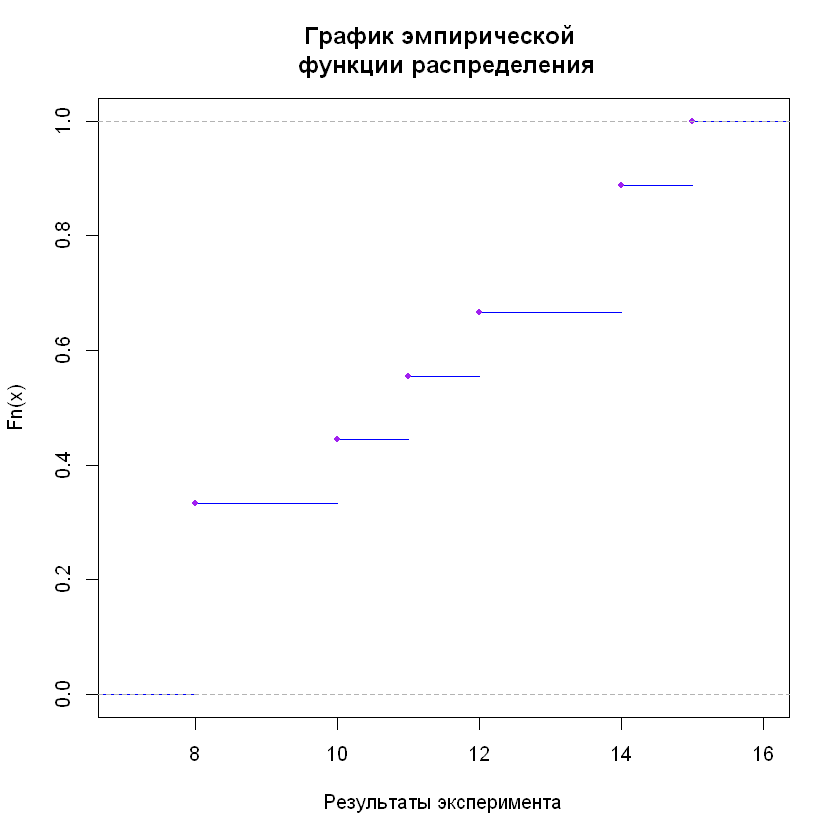

In [8]:
#Строим с помощью функции plot график ecdf.
ecdf1 <- plot(ecdf(intervals$Частота), col.points = 'purple', col.hor = 'blue', pch = 20, 
      main = 'График эмпирической \n функции распределения', xlab = 'Результаты эксперимента')
#ecdf = Empirical Cumulative Distribution Function

**1.4. Найти числовые характеристики выборки: выборочное среднее и выборочную дисперсию**

In [51]:
#С помощью базовых функций mean и var найдём выборочное среднее и выборочную дисперсию.
sample_mean <- mean(numbers)
sample_variance <- var(numbers)

cat('Выборочное среднее =', sample_mean)
cat('\nВыборочная дисперсия =', sample_variance)

Выборочное среднее = 24.352
Выборочная дисперсия = 22.32111

**1.5. Приняв в качестве нулевой гипотезы H0: генеральная совокупность, из которой извлечена выборка, имеет нормальное распределение, проверить её, пользуясь критерием Пирсона при уровне значимости α = 0,025.**

Скачаем пакет "nortest", содержащий функции тестов на нормальное распределение.
- pearsons.test() - функция, которая осуществляет тестирование с помощью критерия хи-квадрат Пирсона.

In [52]:
#install.packages('nortest')
library('nortest')
pearson.test(numbers)


	Pearson chi-square normality test

data:  numbers
P = 4.78, p-value = 0.9054


Получили значение уровень значимости = 0.9054, то есть вероятность отвергнуть H0 при условии, что она верна, = 0.9054. Полученный p-value > α, значит, имеется недостаточно аргументов, чтобы отвергнуть нулевую гипотезу.

**1.6. Найти доверительные интервалы для математического ожидания и среднего квадратичного отклонения при надежности p = 0,9.**

In [53]:
cl = 0.9 #надежность (confidence level)
n <- length(numbers)
sd <- sd(numbers) #с помощью базовой функции sd вычислили стандартное отклонение
sd
df = n - 1 #степени свободы (degrees freedom)

[1] 4.724522

Найдём доверительный интервал для математического ожидания. В R существует функция t.test(), оценивающая две гипотезы:
1. H0: мат. ожидание совпадает со средним выборочным;
2. H1: мат. ожидание отличается от среднего выборочного.
Однако, она также выдаёт интервал, в пределах которого находится математическое ожидание ГС. Расчитаем первый доверительный интервал вручную и при помощи t.test().

При расчётах без функции t.test будет использоваться функция qnorm(), позволяющая найти коэффициент доверия t (будем считать, что результаты экспериментов распределены нормально). В случае t-распределения Стьюдента мы бы использовали функцию qt() для нахождения t.

*Переменная p.* Вероятность того, что доверительный интервал содержит истинное значение мат. ожидания = 0.9, значит, вероятность выхода за нижнюю границу равна 0.05. Получаем, что вероятность не выйти за нижнюю раницу равна 0.95. Это значение и содержит в себе переменная p.

In [54]:
#способ 1.
#Т.к. n > 30, то при вычислении стандартной ошибки среднеквадратическое отклонение заменим на стандартное.
p  <-  (1 - cl) / 2 + cl
se <- qnorm(p) * sd / sqrt(n) #вычислим стандартную ошибку.
left1 <- sample_mean - se
right1 <- sample_mean + se
cat('Доверительный интервал для МО = (', left1, ';', right1, ')', sep = '')

#способ 2.
t.test(numbers, conf.level = .9)
#функция выдаёт края доверительного интервала, равные 23.56754 и 25.13646
cat('Доверительный интервал для МО = (', 23.56754, ';', 25.13646, ')', sep = '')

Доверительный интервал для МО = (23.57489;25.12911)


	One Sample t-test

data:  numbers
t = 51.544, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 23.56754 25.13646
sample estimates:
mean of x 
   24.352 


Доверительный интервал для МО = (23.56754;25.13646)

Найдём доверительный интервал для среднеквадратического отклонения. В его рассчётах будем использовать функцию qchisq(), которая преобразует p-значение и число степеней свободы в соответствующее значение хи-квадрат.

In [64]:
hi1 <- qchisq(p, df) #хи-квадрат для нижней границы интервала (аргумент lower.tail = true по дефолту)
hi2 <- qchisq(p, df, lower.tail = F) #хи-квадрат для верхней границы интервала (аргумент lower.tail = false)

left2 <- sqrt(df) * sd / sqrt(hi1)
right2 <- sqrt(df) * sd / sqrt(hi2)
cat('Доверительный интервал для среднеквадратического отклонения = (', left2, ';', right2, ')', sep = '')

Доверительный интервал для среднеквадратического отклонения = (4.234729;5.355493)

### Задание 2
**2.1. Найти уравнение прямой регрессии y на x.**

In [56]:
#представим входные данные в виде матрицы для удобного восприятия информации :)
freq = c(1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 5, 7, 9, 0, 0, 0, 0,
         4, 6, 14, 0, 0, 0, 0, 4, 6, 1, 0, 0, 0, 0, 7, 8, 4, 0, 0, 0, 0, 9, 5, 0, 0, 0, 0, 0, 6)
mm <- matrix(freq, ncol = 8, nrow = 6)
mm <- rbind(mm, colSums(mm))
mm <- cbind(mm, rowSums(mm))
mm <- rbind(mm, c(seq(300, 1700, 200), sum(seq(300, 1700, 200))))
mm <- cbind(mm, c(seq(5, 30, 5), sum(seq(5, 30, 5)), 0))
colnames(mm) = c('y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'sum/m(x)', 'x')
rownames(mm) = c('x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'sum/m(y)', 'y')
mm <- mm[c('y','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'sum/m(y)'), c('x','y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'sum/m(x)')]

In [57]:
mm

,x,y1,y2,y3,y4,y5,y6,y7,y8,sum/m(x)
y,0,300,500,700,900,1100,1300,1500,1700,8000
x1,5,1,2,5,0,0,0,0,0,8
x2,10,0,2,7,4,0,0,0,0,13
x3,15,0,0,9,6,4,0,0,0,19
x4,20,0,0,0,14,6,7,0,0,27
x5,25,0,0,0,0,1,8,9,0,18
x6,30,0,0,0,0,0,4,5,6,15
sum/m(y),105,1,4,21,24,11,19,14,6,100


In [58]:
#представим входные данные в виде датафрейма для удобных расчётов
n <- 100
yy <- rep(300, 1)
yy <- append(yy, c(rep(500, 4), rep(700, 21), rep(900, 24), rep(1100, 11), rep(1300, 19), rep(1500, 14), rep(1700, 6)))

xx <- rep(5, 8)
xx <- append(xx, c(rep(10,13), rep(15,19), rep(20, 27), rep(25, 18), rep(30,15)))

reg <- data.frame(x = xx, y = yy)
reg

x,y
5,300
5,500
5,500
5,500
5,500
5,700
5,700
5,700
10,700
10,700


In [59]:
sm_x <- sum(reg$x)/n #находим средние выборочные
sm_y <- sum(reg$y)/n
sv_x <- var(reg$x)
sv_y <- var(reg$y)

Уравнение эмпирической линии регресии: 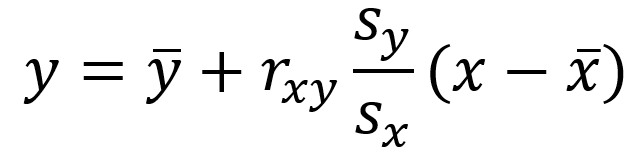

In [60]:
#коэффициент корреляции вычислим с помощью базовой функции R cor(), 
#она вычисляет его автоматически
r_xy <- cor(reg$x, reg$y)
s_x <- sqrt(sv_x) #найдём стандартные отклонения, вычислив корни из выборочных дисперсий x, y
s_y <- sqrt(sv_y)
cat('Уравнение линейной регрессии =','y =', sm_y - r_xy * (s_y/s_x)*sm_x, '+', r_xy * (s_y/s_x), '*x')

Уравнение линейной регрессии = y = 249.0651 + 43.11002 *x

In [61]:
#напишем функцию, вычисляющую у при данном х, чтобы в будущем удобно было находить нужную абсциссу
lin_reg <- function(x) {
  249 + 43.11 * x
}
lin_reg(5)

[1] 464.55

**2.2. Построим график линии регрессии.**
График построим с помощью функции ggscatter() из пакета 'ggpubr'. Функция принимает в качестве аргументов датафрейм с данными, значения Х и У, а также заголовок графика. Опишу остальные аргументы функции:
- add = 'reg.line' - добавление линии регрессии на график
- cor.coef = TRUE - появление автоматически вычисленного коэффициента корреляции
- cor.method = "pearson" - выбор критерия корреляции Пирсона
Также, с помощью функции stat_regline_equation() добавим на график автоматически посчитанное уравнение регрессии, где label.x и label.y - это координаты.

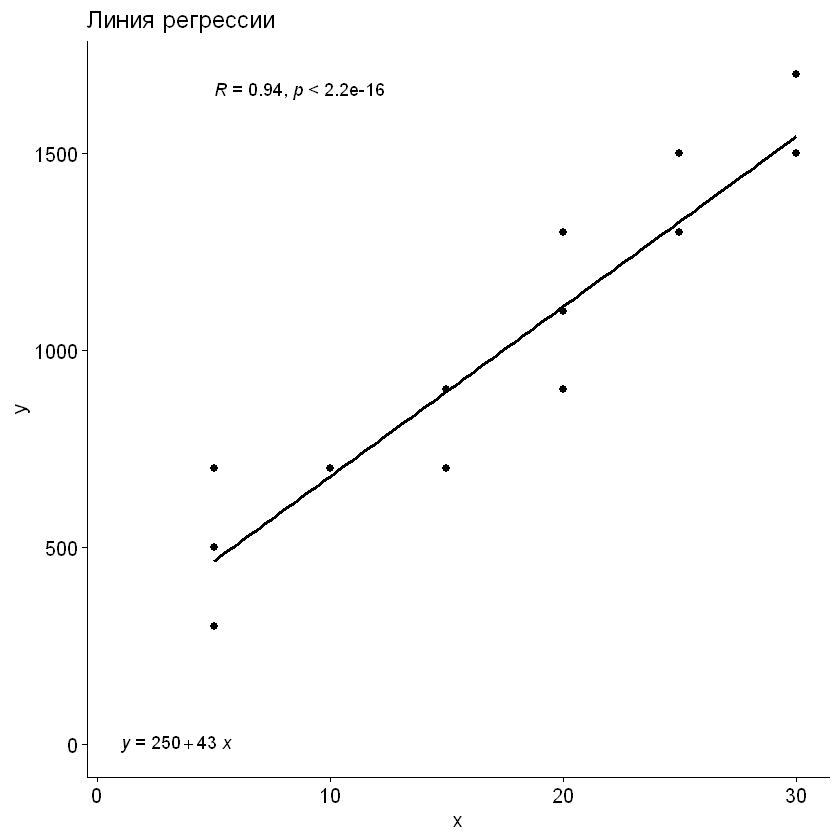

In [62]:

#install.packages('ggpubr') 
#library('ggpubr')
ggscatter(reg, x = 'x', y = 'y', add = 'reg.line', cor.coef = TRUE,
          cor.method = "pearson", main = 'Линия регрессии') + stat_regline_equation(label.x = 1, label.y = 1)

Помимо использования функции для автоматического построения графика, используем функцию curve(), чтобы построить прямую уравнения, которое мы вывели.

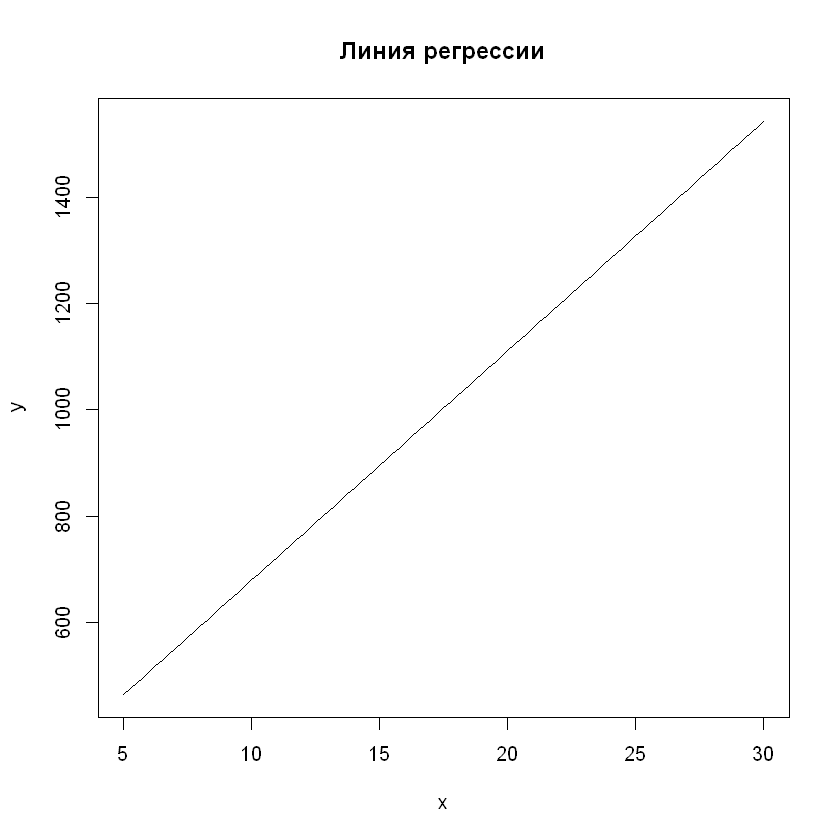

In [63]:
curve(249.0651 + 43.11002*x, main = 'Линия регрессии',  xlab = 'x', ylab = 'y', xlim = c(5,30))